# Reference-based assembly
In the previous steps we have gone through cleaning and trimming of the reads, de-novo assembly of contigs and the alignment of those contigs that represent our target sequences. Now we will use those contigs in order to generate new reference libraries and assemble the reads with the hekp of those reference sequences (=reference-based assembly vs. de-novo assembly in the previous steps). Why doing an assembly again and on top of that, why are we assembling a new reference library, you may wonder. There are several reasons for the steps that follow:

1. **Sensitivity**: So far we have been using one reference library (the bait sequence set or equivalent) for finding matching sequences across all of our samples. While this may be fine if all your organisms are closely related (e.g. within the same genus), in all other cases you may loose many sequences because they are not similar enough to the reference sequence. Not only does this lead to a lower sequence turn-out but it also biases your results toward those seqeunces most similar to the reference sequence. The soultion to this is to use the sequence data we already assembled in the previous steps to create family-, genus- or even sample-specific reference libraries

2. **Intron/Exon structure**: Another reason for creating a new reference library is that you most likely have a set of exon sequences that were used to design the RNA baits for sequence capture. The more variable introns in between are not suitable for designing baits (too variable) but are extremely useful for most phylogenetic analyses (more information). There is a good chance that our contigs will contain parts of the trailing introns or in the best case even span across the complete intron, connecting two exon sequences. This is why we want to use these usually longer and more complete seqeunces for reference-based assembly, rather than the short, clipped exon sequences (**see image below**).

3. **Allelic variation**: Remapping the reads in the process of reference-based assembly will make visible the different alleles at a given locus. We will be able to see how many reads support allele a and how many support allele b and will have a better handle on separating sequencing errors from true variation (by assessing coverage). Further looking at the results of reference-based assembly can help distinguishing paralogues from allelic variation (if too many differences between the variants within one sample in one locus, it may likely be a case of paralogy).

4. **Coverage**: Reference-based assembly will give you a better and more intuitive overview over read-depth for all of your loci. There are excellent visualization softwares that help interpret the results.

In [26]:
from IPython.display import IFrame
print('Reference-based assembly is more powerful when using contigs as reference')
print('rather than the exon sequences from the bait-design step, as it spans')
print('accross adjacent intron sequences.')
IFrame("../../images/exon_vs_contig_based_assembly.pdf", width=600, height=480)

Reference-based assembly is more powerful when using contigs as reference
rather than the exon sequences from the bait-design step, as it spans
accross adjacent intron sequences.


## Creating new reference libraries
In the best scenario you have enough loci that could be recovered for all taxa. In that case the easiest and most efficient solution is to simply extract the contig sequences for all loci for each sample separately and use these as the new sample specific reference library. In any other case it is recommendable to split your samples by genus or family and create a genus/family specific reference sequence for each locus. Using the `--reference-type` flag you can decide which of these options you want to choose. The program also gives you the opportunity to provide a user-generated reference library. In our example data e.g. all samples belong to the same genus, so we decide to use the `alignment-consensus` option, which creates a consensus sequence of the alingment of all samples contig sequences for each locus. If you want to generate sample specific reference libraries, you need to first make a selection of loci that could be assembled for all loci (otherwise you may be lacking reference sequences for some samples).

## Reference-based assembly
There are many additional flags available in order to control the settings for reference-based assembly step. The default settings are chosen to match the average sequence capture dataset. However, it is recommendable to check the resulting `.bam` files in a viewer (such as e.g. [Tablet](https://ics.hutton.ac.uk/tablet/)) and rerun the reference-based assembly until it results in a decent coverage with few-none mismatched reads and unnecessary gaps. To get an overview over the user-options type:

In [30]:
%%bash
source activate secapr_env
secapr reference_assembly -h

usage: secapr reference_assembly [-h] --reads READS
                                 [--reference_type {alignment-consensus,sample-specific,user-ref-lib}]
                                 --reference REFERENCE --output OUTPUT
                                 [--keep_duplicates]
                                 [--min_coverage MIN_COVERAGE] [--k K] [--w W]
                                 [--d D] [--r R] [--c C] [--A A] [--B B]
                                 [--O O] [--E E] [--L L] [--U U]

Create new reference library and map raw reads against the library (reference-
based assembly)

optional arguments:
  -h, --help            show this help message and exit
  --reads READS         Call the folder that contains the trimmed reads,
                        organized in a separate subfolder for each sample. The
                        name of the subfolder has to start with the sample
                        name, delimited with an underscore [_] (default output
                        o

We finally run the command as follows:

    secapr reference_assembly --reads ../../data/processed/cleaned_trimmed_reads --reference_type alignment-consensus --reference ../../data/processed/alignments/contig_alignments --output ../../data/processed/remapped_reads --min_coverage 4

## Reviewing results of reference-based assembly
`secapr` provides several plotting options that help to review the results of the reference-based assembly. Below we plot the read-coverage for each sample below the presence/absence matrix of the contig data. Read-coverage is plotted according to a heatmap, with higher read-coverage resulting in 'hotter' colors. Below we use the flag `norm_value=10` in the plotting command in order to apply the heatmap scale for values between 0 and 10. All loci covered by more than 10 reads are colored with the same heatcolor as the value 10, which is black. As you see many loci were not very well covered in our example data (light colors, see legend below):

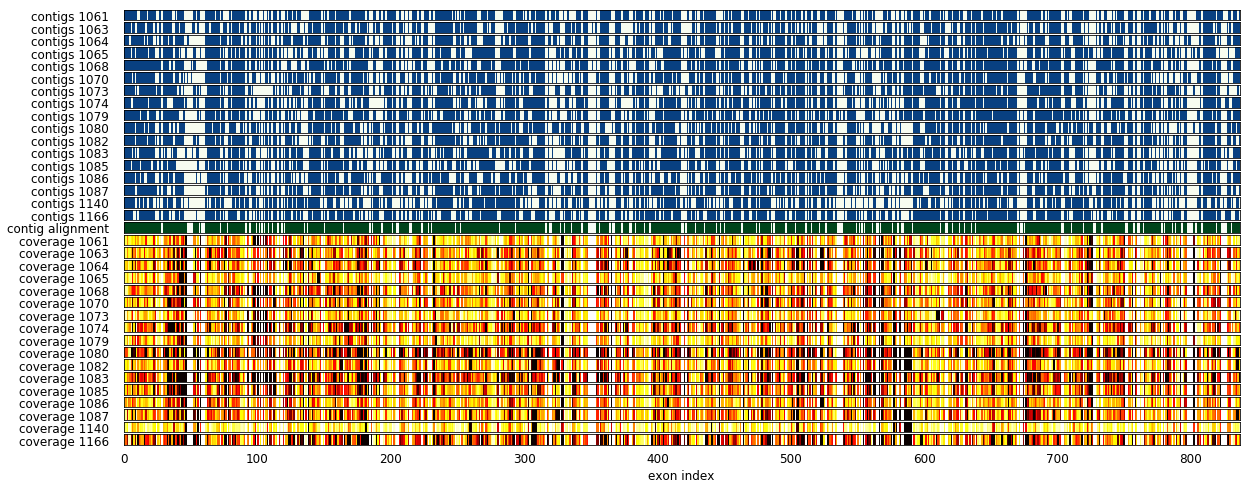

In [2]:
import sys
sys.path.append("../../src")
import plot_contig_data_function as secapr_plot

contig_input_file = '../../data/processed/target_contigs/match_table.txt'
alignment_folder = '../../data/processed/alignments/contig_alignments'
read_cov_file = '../../data/processed/remapped_reads/average_cov_per_locus.txt'
read_cov_folder = '/'.join(read_cov_file.split('/')[:-1])

fig = secapr_plot.plot_contigs_alignments_read_cov(contig_input_file,alignment_folder,read_cov_file,norm_value=10)
fig
#fig.savefig(os.path.join(read_cov_folder,'contig_exon_coverage_matrix.png'), dpi = 500)

Here are the corresponding legends:

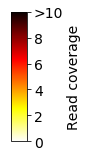

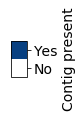

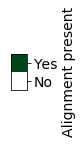

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
legend = secapr_plot.plot_heatmap_legend(0,10,width=.75,height=2, font_size=14)
contig = secapr_plot.general_scale_bar(2,tick_labels=['No','Yes'],x0=.1,x1=.25,plot_height=.5,plot_width=.3,font_size = 14,color1='white',color2=(0.031372549019607843, 0.25098039215686274, 0.50588235294117645),height=1,width=.75,plot_label='Contig present')
align = secapr_plot.general_scale_bar(2,tick_labels=['No','Yes'],x0=.1,x1=.25,plot_height=.5,plot_width=.3,font_size = 14,color1='white',color2=(0.0, 0.26666666666666666, 0.10588235294117647),height=1,width=.75,plot_label='Alignment present')
plt.show(contig)
plt.show(align)
plt.show(legend)
#legend.savefig(os.path.join(read_cov_folder,'legend_exon_coverage.png'), dpi = 500)

Once you are satisfied with the results of the reference-based assembly, you can move on to the [allele phasing step](./phasing.ipynb). If there are many loci with very low read coverage (which will complicate allele phasing) it is recommendable to go through the process of [locus selection](./locus_selection.ipynb) first.

<div class="alert alert-block alert-info">Tip: Split the plot into separate subplots for better readibility (see below).</div>

Finished with splitting the plot.


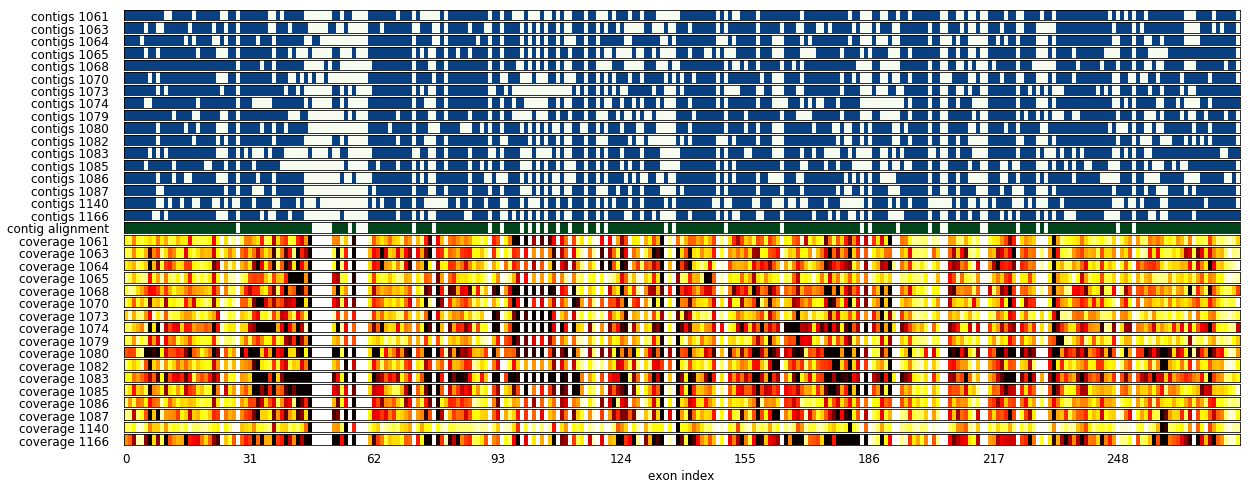

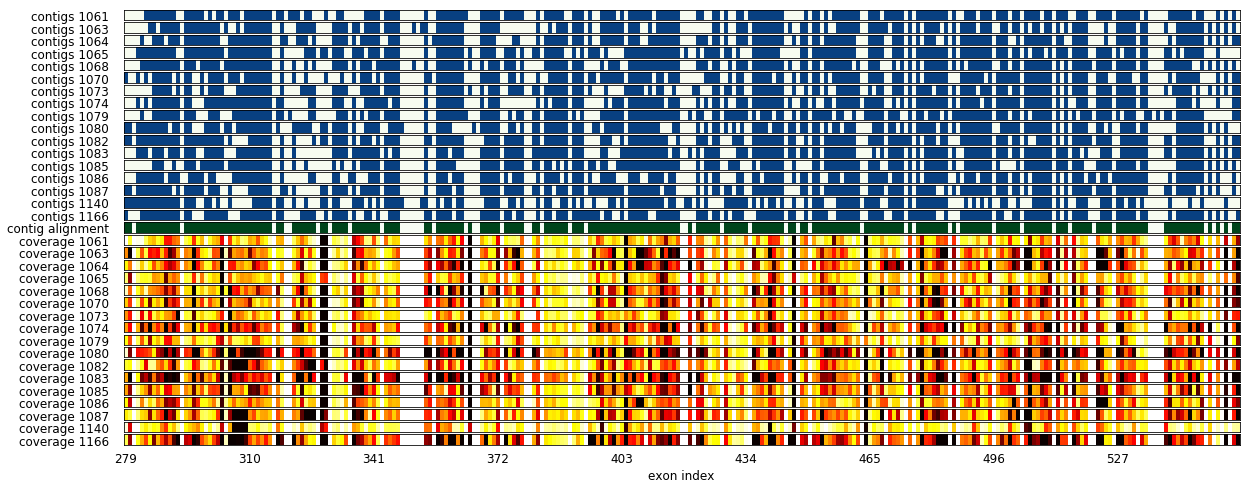

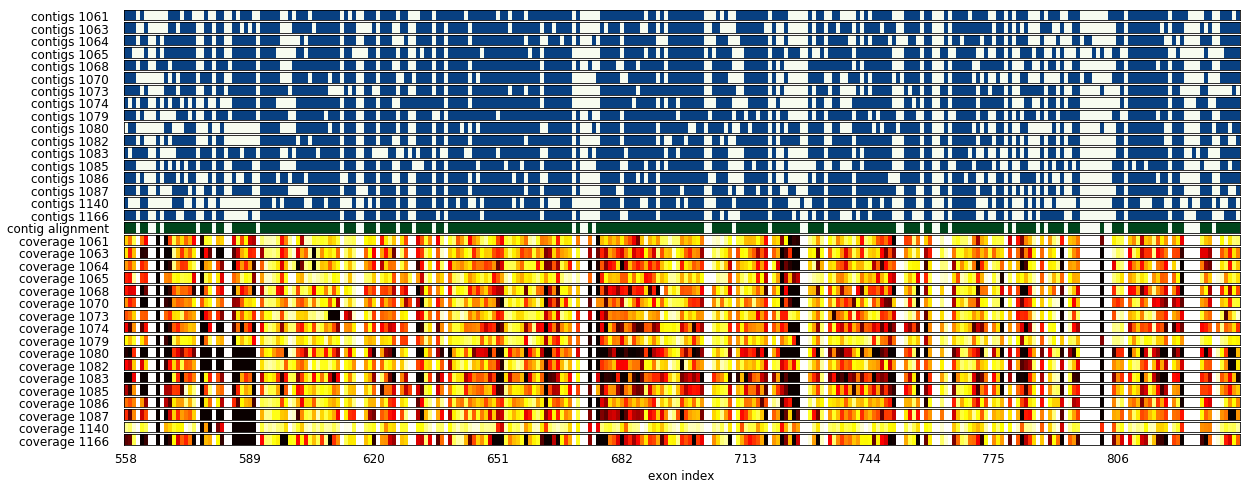

In [23]:
import sys
sys.path.append("../../src")
import plot_contig_data_function as secapr_plot

contig_input_file = '../../data/processed/target_contigs/match_table.txt'
alignment_folder = '../../data/processed/alignments/contig_alignments'
read_cov_file = '../../data/processed/remapped_reads/average_cov_per_locus.txt'
images = secapr_plot.plot_contigs_alignments_read_cov(contig_input_file,alignment_folder,read_cov_file,number_of_rows=3,norm_value=10)
print('Finished with splitting the plot.')

[Previous page](align_contigs.ipynb) | [Next page](locus_selection.ipynb)